<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import cmath

In [2]:
"""Funzioni di Abbellimento"""
def central_ax(ax):

    # Move left y-axis and bottim x-axis to centre, passing through (0,0)
    ax.spines['left'].set_position('zero')
    ax.spines['bottom'].set_position('zero')

    # Eliminate upper and right axes
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')

    # Show ticks in the left and lower axes only
    ax.tick_params(
        axis='both',       # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        #bottom=False,      # ticks along the bottom edge are off
        #top=False,         # ticks along the top edge are off
        right=False,
        left=False,
        labelleft=False,)
        #labelbottom=False) # labels along the bottom edge are off
    # Axis name
    # x
    ax.xaxis.set_label_coords(1.05, 0.5)
    ax.set_xlabel('$x$')
    # y
    ax.yaxis.set_label_coords(0.52, 1.0)
    ylab = ax.set_ylabel('$v$')
    # rotate horizzontaly y
    ylab.set_rotation(0)
    return ax


def arrowed_spines(fig, ax):

    xmin, xmax = ax.get_xlim() 
    ymin, ymax = ax.get_ylim()

    # removing the default axis on all sides:
    for side in ['bottom','right','top','left']:
        ax.spines[side].set_visible(False)

    # removing the axis ticks
#     plt.xticks([]) # labels 
#     plt.yticks([])
#     ax.xaxis.set_ticks_position('none') # tick markers
#     ax.yaxis.set_ticks_position('none')

    # get width and height of axes object to compute 
    # matching arrowhead length and width
    dps = fig.dpi_scale_trans.inverted()
    bbox = ax.get_window_extent().transformed(dps)
    width, height = bbox.width, bbox.height

    # manual arrowhead width and length
    hw = 1./60.*(ymax-ymin)
    hl = 1./60.*(xmax-xmin)
    lw = 1. # axis line width
    ohg = 0.3 # arrow overhang

    # compute matching arrowhead length and width
    yhw = hw/(ymax-ymin)*(xmax-xmin)* height/width 
    yhl = hl/(xmax-xmin)*(ymax-ymin)* width/height

    # draw x and y axis
    ax.arrow(xmin, 0, xmax-xmin, 0., fc='k', ec='k', lw = lw, 
             head_width=hw, head_length=hl, overhang = ohg, 
             length_includes_head= True, clip_on = False) 

    ax.arrow(0, ymin, 0., ymax-ymin, fc='k', ec='k', lw = lw, 
             head_width=yhw, head_length=yhl, overhang = ohg, 
             length_includes_head= True, clip_on = False)


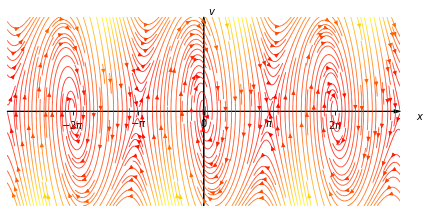

In [3]:
def param():
    g = 1
    l = 1
    gamma = 0.4
    dt = 0.01
    return g, l, gamma, dt   

def plot_curve(g, l, gamma, dt, xlim, vlim, ax, fig, *argv, **kwargs):
    x, v = np.meshgrid(np.arange(-xlim, xlim + dt, dt), np.arange(-vlim, vlim + dt, dt))
    xdot = v
    vdot = - g/l*np.sin(x) - gamma*v
    ax.streamplot(x, v, xdot, vdot, linewidth=0.8, arrowsize=0.8, color=(xdot**2+vdot**2), *argv, **kwargs)
    return ax

def main():
    g, l, gamma, dt = param()
    xlim = 3*np.pi
    vlim = 1.2
    fig = plt.figure(figsize=(6,3))
    ax = fig.add_subplot(111)
    o1 = 0.1
    ax = central_ax(ax)
    seed_pt = np.array([[-o1, -o1 , -o1, 0, 0, o1, o1, o1], [-vlim, 0, vlim, -vlim , vlim, -vlim, 0, vlim]])
    plot = plot_curve(g, l, gamma, dt, xlim, vlim, ax, fig, density=[4, 7], cmap='autumn')#, start_points=seed_pt.T)
    ax.set_xticks([-2*np.pi, -np.pi, 0, np.pi, 2*np.pi])
    ax.set_xticklabels([r'$-2\pi$', r'$-\pi$', '0', r'$\pi$', r'$2\pi$'])
    ax = arrowed_spines(fig, ax)
    plt.tight_layout()
    plt.savefig("../../figures/15_pendolo.png", dpi = 300)
    plt.show()
main()

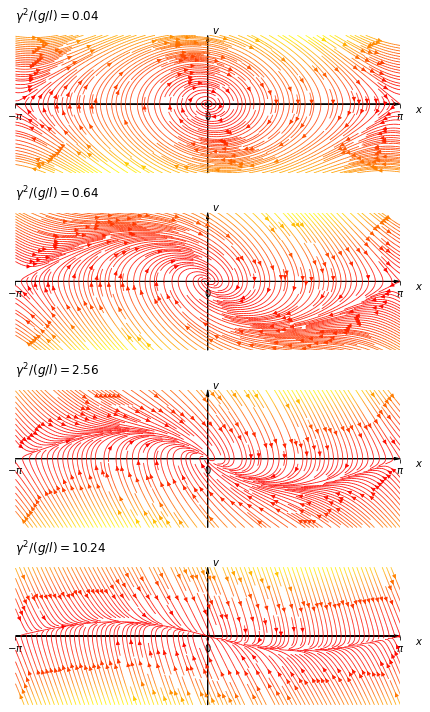

In [41]:
def aux_f(ax, fig, xlim, vlim, g, l, gamma, dt):
    ax = central_ax(ax)
    #seed_pt = np.array([[-o1, -o1 , -o1, 0, 0, o1, o1, o1], [-vlim, 0, vlim, -vlim , vlim, -vlim, 0, vlim]])
    plot = plot_curve(g, l, gamma, dt, xlim, vlim, ax, fig, density=[3, 5], cmap='autumn')#, start_points=seed_pt.T)
    ax.set_xticks([-np.pi, 0, np.pi])
    ax.set_xticklabels([r'$-\pi$', '0', r'$\pi$'])
    ax.set_title(r'$\gamma^2/(g/l) = $' + f'{gamma**2/(g/l):.2f}', loc='left', pad=15, fontsize=12)

    ax = arrowed_spines(fig, ax)

def main():
    g, l, gamma, dt = param()
    xlim = np.pi
    vlim = 1.5
    fig, (ax1,ax2,ax3, ax4) = plt.subplots(4,1, figsize = (6,10))
    ax1 = aux_f(ax1, fig, xlim, vlim, g, l, gamma/2, dt)
    ax2 = aux_f(ax2, fig, xlim, vlim, g, l, 2*gamma, dt)
    ax3 = aux_f(ax3, fig, xlim, vlim, g, l, 4*gamma, dt)
    ax4 = aux_f(ax4, fig, xlim, vlim, g, l, 8*gamma, dt)
    plt.tight_layout()
    plt.savefig("../../figures/15_pendolo_accartoccio.png", dpi = 300)
    plt.show()
main()